In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Train_call.txt',delimiter = '\t')
labels = pd.read_csv('Train_clinical.txt',delimiter = '\t')

In [3]:
data = data.transpose()
data = data[4:]
data = data.reset_index()
data.rename(columns={'index':'Sample'}, inplace=True)
data.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [4]:
labels.head()

,Sample,Subgroup
0,Array.129,HER2+
1,Array.34,HR+
2,Array.67,HR+
3,Array.24,Triple Neg
4,Array.22,Triple Neg


In [5]:
# Combine labels and instances
combined = pd.merge(data,labels,on='Sample',)
combined

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,HER2+
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,HR+


In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification

In [7]:
X = combined.iloc[:,1:2835]
y = combined['Subgroup']

combined.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg


In [8]:
y.value_counts()

HR+           36
HER2+         32
Triple Neg    32
Name: Subgroup, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=4)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (75, 2834)
X_test (25, 2834)
y_train (75,)
y_test (25,)


In [10]:
y_train.value_counts()

HR+           27
HER2+         25
Triple Neg    23
Name: Subgroup, dtype: int64

In [11]:
# label encode y_train for all models

from sklearn.preprocessing import LabelEncoder 

lc = LabelEncoder() 
lc = lc.fit(y_train) 
lc_y_train = lc.transform(y_train)

# transform lc_y_train into series
lc_y_train = pd.Series(lc_y_train)

In [12]:
# label encode y_test
lc1 = lc.fit(y_test) 
lc_y_test = lc1.transform(y_test)

# transform lc_y_test into series
lc_y_test = pd.Series(lc_y_test)

## Mutal Information

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib.pyplot import figure
from matplotlib import pyplot

In [14]:
mi_score = mutual_info_classif(X_train,y_train, random_state=42)
pd.DataFrame(mi_score)

,0
0,0.028863
1,0.131982
2,0.113797
3,0.021908
4,0.000000
...,...
2829,0.002164
2830,0.000000
2831,0.000000
2832,0.144350


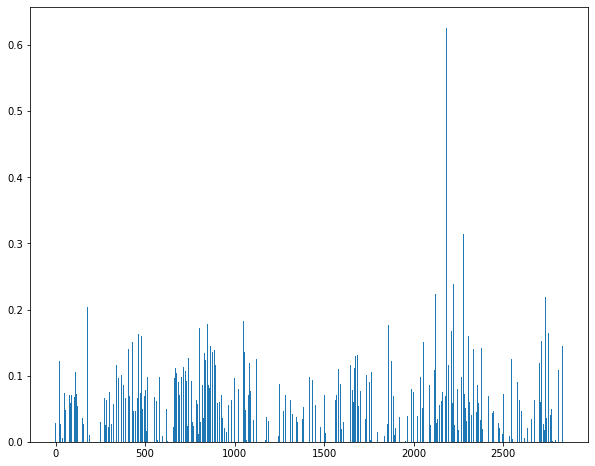

In [15]:
# what are scores for the features
#for i in range(len(mi_score)):
#	print('Feature %d: %f' % (i, mi_score[i]))
# plot the scores
figure(figsize=(10,8))
pyplot.bar([i for i in range(len(mi_score))], mi_score)
pyplot.show()

In [16]:
# calculate the mean score
fs_mutinfo_all_df = pd.DataFrame(mi_score)
fs_mutinfo_all_df.rename(columns={0:'Scores'}, inplace=True)
mean_mutinfo = fs_mutinfo_all_df['Scores'].mean()
print('Mean score of mutual information:', mean_mutinfo)

# select features higher or equal to the mean
fs_mutinfo = fs_mutinfo_all_df.loc[fs_mutinfo_all_df['Scores'] >= 0.07]

Mean score of mutual information: 0.03850443769847561


In [17]:
fs_mutinfo

,Scores
1,0.131982
2,0.113797
5,0.082864
6,0.083359
7,0.087042
...,...
2773,0.114469
2809,0.082768
2810,0.109127
2820,0.119484


In [18]:
# get top 30 features
fs_mutinfo.nlargest(30,'Scores')

,Scores
2184,0.626373
842,0.355970
2279,0.314373
822,0.309891
734,0.307017
2214,0.273375
58,0.266330
1014,0.260261
1664,0.250237
836,0.246509


In [19]:
# get index of selected features
selected_features_list= list(fs_mutinfo.T.columns)

# fit X_train and X_test with selected features
X_train_fs_mutinfo = X_train.filter(items=selected_features_list, axis=1)
X_test_fs_mutinfo = X_test.filter(items=selected_features_list, axis=1)
X_train_fs_mutinfo

,1,2,5,6,7,16,18,22,25,29,...,2754,2755,2761,2762,2766,2773,2809,2810,2820,2832
60,0,0,0,0,0,0,-1,-1,-1,-1,...,0,0,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,-1,-1,1,0,0,1,1,1,1,1
70,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,1,1
71,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
19,0,0,0,0,0,0,0,0,0,0,...,-1,-1,1,0,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,1,1,1,0,1,1,1,1,0,...,0,0,1,-1,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1
69,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,2,2,1,2,2
55,0,0,0,0,0,-1,0,0,0,1,...,-1,-1,1,1,1,1,1,1,0,0


## Logistic Regression

In [20]:
from sklearn.pipeline import Pipeline
import time

start = time.time()

pipe = Pipeline([('classifier' , LogisticRegression(multi_class='multinomial'))])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train_fs_mutinfo, lc_y_train)

print(f"Run time was : {time.time() - start}s")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Run time was : 8.057777166366577s


In [21]:
print('Best Score: %s' % best_clf.best_score_)
print('Best Hyperparameters: %s' % best_clf.best_params_)

Best Score: 0.8533333333333333
Best Hyperparameters: {'classifier': LogisticRegression(C=0.615848211066026, solver='liblinear'), 'classifier__C': 0.615848211066026, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [22]:
from pprint import pprint
pprint(best_clf.best_estimator_.get_params())

{'classifier': LogisticRegression(C=0.615848211066026, solver='liblinear'),
 'classifier__C': 0.615848211066026,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'auto',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'liblinear',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False,
 'memory': None,
 'steps': [('classifier',
            LogisticRegression(C=0.615848211066026, solver='liblinear'))],
 'verbose': False}


## Logistic Regression Model Evaluation: Training Set

In [23]:
y_pred_train = best_clf.predict(X_train_fs_mutinfo)
y_pred_train

array([0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1,
       2, 0, 0, 1, 2, 1, 1, 2, 0])

In [24]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_mx_train = confusion_matrix(lc_y_train, y_pred_train)

In [25]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
confusion_mx_train_df = pd.DataFrame(confusion_mx_train,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

In [26]:
confusion_mx_train_df

,HER2+,HR+,Triple Neg
HER2+,25,0,0
HR+,0,27,0
Triple Neg,0,0,23


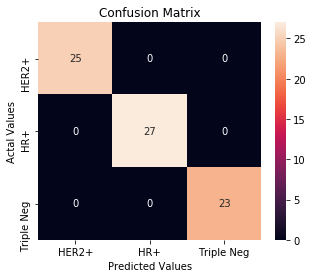

In [27]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_train_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [28]:
from sklearn.metrics import f1_score

In [29]:
# get f1 score
from sklearn.metrics import f1_score
f1_score_xgb = f1_score(lc_y_train, y_pred_train, average=None)


print('f1 score: ', f1_score_xgb)

f1 score:  [1. 1. 1.]


In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

## Logistic Regression Model Evaluation: Test Set

In [31]:
y_pred_test = best_clf.predict(X_test_fs_mutinfo)
y_pred_test

array([2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 0, 0])

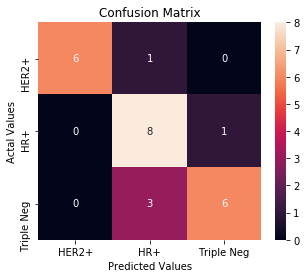

In [32]:
confusion_mx_test = confusion_matrix(lc_y_test, y_pred_test)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
confusion_mx_test_df = pd.DataFrame(confusion_mx_test,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_test_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [33]:
# get f1 score (K = )
from sklearn.metrics import f1_score
f1_score_log_reg = f1_score(lc_y_test, y_pred_test, average=None)

print('f1 score: ', f1_score_log_reg)

f1 score:  [0.92307692 0.76190476 0.75      ]


In [36]:
from sklearn.metrics import accuracy_score
print(f"Accuracy score: ", accuracy_score(lc_y_test,y_pred_test))

Accuracy score:  0.8


## Random Forest with Mutual Info

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
random_state = 42


start = time.time()

n_estimators = [1,5,10,15,20]
max_depth = [1,2,3,5,10,20]
min_samples_leaf = [1,2,3,4,5]
bootstrap = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

clf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train_fs_mutinfo, lc_y_train)

print(f"Run time was : {time.time() - start}s")


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Run time was : 29.910390853881836s


In [46]:
print('Best Score: %s' % best_clf.best_score_)
print('Best Hyperparameters: %s' % best_clf.best_params_)

Best Score: 0.8133333333333332
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 20}


In [47]:
from pprint import pprint
pprint(best_clf.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Random Forest Evaluation: (Skipping training) Test Set

In [48]:
y_pred_test = best_clf.predict(X_test_fs_mutinfo)
y_pred_test

array([2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 0, 0])

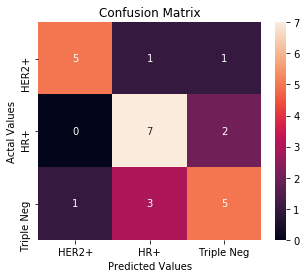

In [49]:
confusion_mx_test = confusion_matrix(lc_y_test, y_pred_test)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
confusion_mx_test_df = pd.DataFrame(confusion_mx_test,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_test_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score
print(f"Accuracy score: ", accuracy_score(lc_y_test,y_pred_test))

Accuracy score:  0.68


## Doing XGBoost Again just to make sure its the same results as in the other notebook

In [58]:
from xgboost import XGBClassifier

start = time.time()

# define model
model = XGBClassifier(random_state=42, num_class = 3, objective = 'multi:softmax')

# define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search_svm space_svm
space_xgb = dict()
space_xgb['max_depth'] = range(3,10)
space_xgb['min_child_weight'] = range(1,6)
space_xgb['gamma'] = [i/10.0 for i in range(0,5)]
# space_xgb['subsample'] = [i/10.0 for i in range(6,10)]
# space_xgb['colsample_bytree'] = [i/10.0 for i in range(6,10)]
# space_xgb['reg_alpha'] = [1e-5, 1e-2, 0.1, 1, 100]

# define search_svm
search_xgb = GridSearchCV(model, space_xgb, scoring='accuracy', n_jobs=-1, cv=5, verbose = 20)

# execute search_svm
result_xgb = search_xgb.fit(X_train_fs_mutinfo, lc_y_train)

# # execute search_svm (on feature selection data)
# result_svm = search_svm.fit(x_train_new_svm, y_train)

# summarize result_svm
print('Best Score: %s' % result_xgb.best_score_)
print('Best Hyperparameters: %s' % result_xgb.best_params_)

# print winning set of hyperparameters
from pprint import pprint
pprint(result_xgb.best_estimator_.get_params())

print("\n\n")
print(f"Run time was: {time.time() - start}")

Fitting 5 folds for each of 175 candidates, totalling 875 fits


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:02:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Score: 0.8400000000000002
Best Hyperparameters: {'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 4}
{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0.0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_class': 3,
 'num_parallel_tree': 1,
 'objective': 'multi:softprob',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 

## XGBOOST test set evaluation

In [62]:
y_pred_test = result_xgb.predict(X_test_fs_mutinfo)
y_pred_test

array([2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 0, 0])

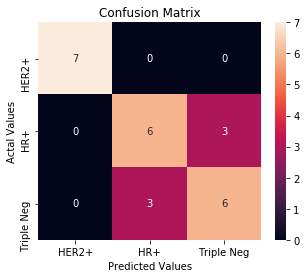

In [63]:
confusion_mx_test = confusion_matrix(lc_y_test, y_pred_test)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
confusion_mx_test_df = pd.DataFrame(confusion_mx_test,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_test_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [64]:
from sklearn.metrics import accuracy_score
print(f"Accuracy score: ", accuracy_score(lc_y_test,y_pred_test))

Accuracy score:  0.76
